# Data Preprocessing Task

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import os

## Read the Dataset provided (Dataset 1)

* For my own dataset I have used a Air pollution measurement dataset.

* Each rows contain the hourly measurement recording of the 5 pollutants (NO, NO2, NOX, PM10, and PM2.5).
  
* The data was collected in a location in Londan for the entirety of year 2017.

In [2]:
DATA_PATH=os.path.join(os.getcwd(),"LaqnData.csv")
data_1=pd.read_csv(DATA_PATH)

In [3]:
data_1.head() ##preview the dataset using head function

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,CO,01/01/2018 00:00,NaN,mg m-3,P
1,HI0,CO,01/01/2018 00:15,NaN,mg m-3,P
2,HI0,CO,01/01/2018 00:30,NaN,mg m-3,P
3,HI0,CO,01/01/2018 00:45,NaN,mg m-3,P
4,HI0,CO,01/01/2018 01:00,NaN,mg m-3,P


In [4]:
print("shape of dataset ----> ",data_1.shape)
print("Number of examples -----> ",data_1.shape[0])
print("Number of columns -----> ",data_1.shape[1])

shape of dataset ---->  (175200, 6)
Number of examples ----->  175200
Number of columns ----->  6


### Quick check of the statistics of the dataset using pandas api

As you could see using the describe function it gives us the basic statistics out of it

In [5]:
data_1.describe()

,Value
count,131724.000000
mean,48.050503
std,54.252123
min,0.000000
25%,12.500000
50%,33.200000
75%,64.200000
max,643.900020


### Info function gives us the information about how many null data we have out of total entries and along with the datatype

In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Site                     175200 non-null  object 
 1   Species                  175200 non-null  object 
 2   ReadingDateTime          175200 non-null  object 
 3   Value                    131724 non-null  float64
 4   Units                    175200 non-null  object 
 5   Provisional or Ratified  175200 non-null  object 
dtypes: float64(1), object(5)
memory usage: 8.0+ MB


### 1. Remove Duplicates value 

In [7]:
# shape before removing duplicates

In [8]:
data_1.shape

(175200, 6)

In [9]:
data_1 = data_1.drop_duplicates()

In [10]:
data_1.shape

(175200, 6)

* So we conclude that there is no duplicates.

### 2. Remove unwanted columns

* drop function allows to drop any column which is unncessary and using inplace="True", does not show the column in the dataframe when we see the dataframe back again

* In this case we dont want datetime when it was recorded and the site as it contains single value doesnot provide any insight.

In [11]:
data_1.drop(columns=['ReadingDateTime', 'Site'], axis=1, inplace=True)

### 3. Checking the null values

In [12]:
data_1.isna().sum()

Species                        0
Value                      43476
Units                          0
Provisional or Ratified        0
dtype: int64

In [13]:
##from the above info function, we can see that Value column has 131724 float values, so rest 43476 contain null values,
## even from the above dataframe view we saw Value column has NaN value
## so we need to remove those rows or impute with some impute techniques
## here we would be imputing with mean of the value.


print('rows present before handling nan :', data_1.shape[0])
data_1['Value'] = data_1['Value'].fillna(data_1['Value'].mean())
print('rows present after handling nan :', data_1.shape[0])

rows present before handling nan : 175200
rows present after handling nan : 175200


### 4. Encoding of the categorical variable

In [14]:
data_1['Provisional or Ratified'].value_counts()

Provisional or Ratified
R    140160
P     35040
Name: count, dtype: int64

#### binary encoding :

* As there are only two value, we will use binary encoding and replace the value with 0 and 1.


In [15]:
data_1['Provisional or Ratified'] = data_1['Provisional or Ratified'].replace({'R': 1, 'P': 0})

In [16]:
data_1.head()

,Species,Value,Units,Provisional or Ratified
0,CO,48.050503,mg m-3,0
1,CO,48.050503,mg m-3,0
2,CO,48.050503,mg m-3,0
3,CO,48.050503,mg m-3,0
4,CO,48.050503,mg m-3,0


In [17]:
data_1['Species'].value_counts()

Species
CO     35040
NO     35040
NO2    35040
NOX    35040
O3     35040
Name: count, dtype: int64

#### One-hot enconding:

* As there are multiple value in Species. We will apply one-hot encoding as there is no sequence here. 

In [18]:
data_1 = pd.get_dummies(data_1, columns=['Species'], dtype=int)

In [19]:
data_1.head()

,Value,Units,Provisional or Ratified,Species_CO,Species_NO,Species_NO2,Species_NOX,Species_O3
0,48.050503,mg m-3,0,1,0,0,0,0
1,48.050503,mg m-3,0,1,0,0,0,0
2,48.050503,mg m-3,0,1,0,0,0,0
3,48.050503,mg m-3,0,1,0,0,0,0
4,48.050503,mg m-3,0,1,0,0,0,0


In [20]:
data_1['Units'].value_counts()

Units
ug m-3           105120
mg m-3            35040
ug m-3 as NO2     35040
Name: count, dtype: int64

#### Again we impliment the same for the Units column

In [21]:
data_1 = pd.get_dummies(data_1, columns=['Units'], dtype=int)

In [22]:
data_1.head()

,Value,Provisional or Ratified,Species_CO,Species_NO,Species_NO2,Species_NOX,Species_O3,Units_mg m-3,Units_ug m-3,Units_ug m-3 as NO2
0,48.050503,0,1,0,0,0,0,1,0,0
1,48.050503,0,1,0,0,0,0,1,0,0
2,48.050503,0,1,0,0,0,0,1,0,0
3,48.050503,0,1,0,0,0,0,1,0,0
4,48.050503,0,1,0,0,0,0,1,0,0


### 5. Split the dataset

In [23]:
data_train, data_test = train_test_split(data_1, test_size=0.25)

### show the dataset size after spliting the dataset

In [24]:
print(data_train.shape)
print(data_test.shape)

(131400, 10)
(43800, 10)


#### Mean and standard deviation result for numerical columns

* As there is a single column that is numerical we will only calculate the mean and standard deviation for the same column

In [25]:
Numeric_columns = ['Value']
for col in Numeric_columns:
  print("Column name : ",col)
  print('Training set mean:', data_train[col].mean())
  print('Testing set mean:', data_test[col].mean())
  print('Training set std:', data_train[col].std())
  print('Testing set std:', data_test[col].std())

Column name :  Value
Training set mean: 48.0201911489353
Testing set mean: 48.141436815864544
Training set std: 46.884353690008936
Testing set std: 47.510488663962995


### Conclusion

* We can see that the training datasets mean and standard deviation is slightly less than the test set.

## Read the Dataset provided (Dataset 2)

In [26]:
DATA_PATH_SalaryPrediction=os.path.join(os.getcwd(),"SalaryPrediction.csv")
data_SalaryPrediction=pd.read_csv(DATA_PATH_SalaryPrediction)

In [27]:
data_SalaryPrediction.head() ##preview the dataset using head function

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23.0,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30.0,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35.0,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31.0,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",NaN,Man UFC,Premier League,ESP,Goalkeeper,480,45


In [28]:
data_SalaryPrediction.columns ## columns present in the traffic dataset

Index(['Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'], dtype='object')

In [29]:
print("shape of dataset ----> ",data_SalaryPrediction.shape)
print("Number of examples -----> ",data_SalaryPrediction.shape[0])
print("Number of columns -----> ",data_SalaryPrediction.shape[1])

shape of dataset ---->  (3907, 8)
Number of examples ----->  3907
Number of columns ----->  8


### Below we would be following same basic techniques to get the statistics as we did in the above

In [30]:
data_SalaryPrediction.describe()

,Age,Apps,Caps
count,3833.000000,3907.000000,3907.000000
mean,24.060788,140.057077,8.926542
std,4.933452,131.694425,20.518234
min,18.000000,0.000000,0.000000
25%,20.000000,15.000000,0.000000
50%,23.000000,115.000000,0.000000
75%,28.000000,224.500000,6.000000
max,41.000000,715.000000,180.000000


In [31]:

data_SalaryPrediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Wage      3907 non-null   object 
 1   Age       3833 non-null   float64
 2   Club      3907 non-null   object 
 3   League    3907 non-null   object 
 4   Nation    3907 non-null   object 
 5   Position  3907 non-null   object 
 6   Apps      3907 non-null   int64  
 7   Caps      3907 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 244.3+ KB


### 1. Remove Duplicates value 

In [32]:
# shape before removing duplicates

In [33]:
data_SalaryPrediction.shape

(3907, 8)

In [34]:
data_SalaryPrediction = data_SalaryPrediction.drop_duplicates()

In [35]:
data_SalaryPrediction.shape

(3842, 8)

* There were some duplicated value which we removed.

### 2. Remove unwanted columns

* In this dataset, all are important columns. So we will keep all columns for now.

In [36]:
#data_1.drop(columns=[], axis=1, inplace=True)

### 3. Checking the null values

In [37]:
data_SalaryPrediction.isna().sum()

Wage         0
Age         74
Club         0
League       0
Nation       0
Position     0
Apps         0
Caps         0
dtype: int64

In [38]:
##from the above info function, we can see that Value column has 131724 float values, so rest 43476 contain null values,
## even from the above dataframe view we saw Value column has NaN value
## so we need to remove those rows or impute with some impute techniques
## here we would be imputing with mean of the value.


print('rows present before handling nan :', data_SalaryPrediction.shape[0])
data_SalaryPrediction['Age'] = data_SalaryPrediction['Age'].fillna(int(data_SalaryPrediction['Age'].median()))
print('rows present after handling nan :', data_SalaryPrediction.shape[0])

rows present before handling nan : 3842
rows present after handling nan : 3842


### 4. Transformation of the data

In [39]:
data_SalaryPrediction.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23.0,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30.0,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35.0,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31.0,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",24.0,Man UFC,Premier League,ESP,Goalkeeper,480,45


* We see that Wage column should be numerical but it is object datatype. So we will remove comma and make it to numerical.

In [40]:
data_SalaryPrediction['Wage'] = data_SalaryPrediction['Wage'].str.replace(",",'').astype(int)

## scatter plot wage v/s age


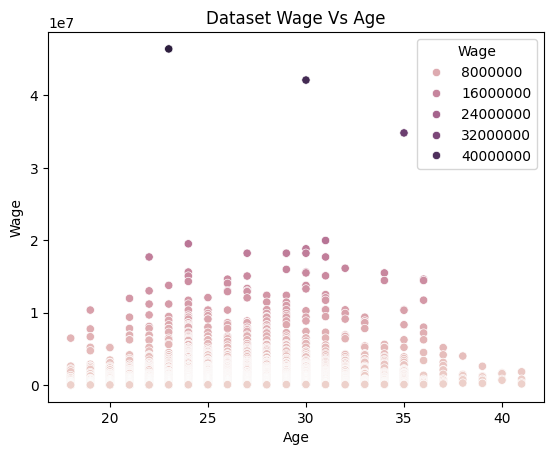

In [41]:
sns.scatterplot(data=data_SalaryPrediction,  x='Age', y='Wage',hue="Wage")
plt.title('Dataset Wage Vs Age')
plt.show()

## Bar plot wage v/s league


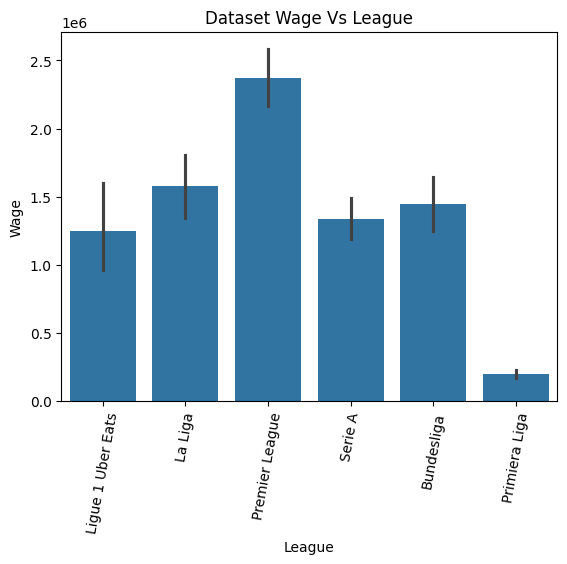

In [42]:
sns.barplot(data=data_SalaryPrediction, x="League", y="Wage")
plt.title('Dataset Wage Vs League')
plt.xticks(rotation=80)
plt.show()

## Bar plot wage v/s age


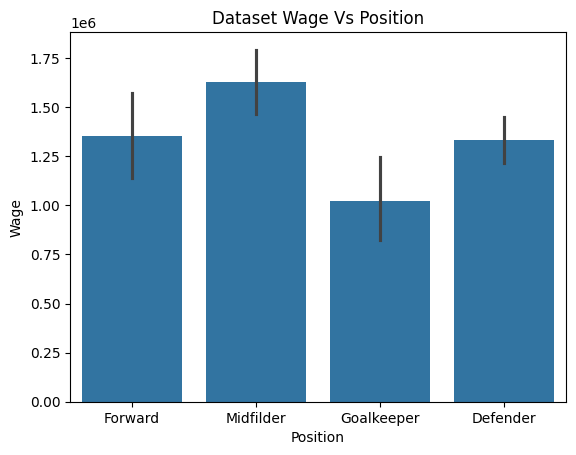

In [43]:
## bar plot wage v/s age

sns.barplot(data=data_SalaryPrediction, x="Position", y="Wage")
plt.title('Dataset Wage Vs Position')
plt.show()

### 5. Encoding of the categorical variable

In [44]:
data_SalaryPrediction.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,46427000,23.0,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,42125000,30.0,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,34821000,35.0,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,19959000,31.0,R. Madrid,La Liga,BEL,Forward,443,120
4,19500000,24.0,Man UFC,Premier League,ESP,Goalkeeper,480,45


In [45]:
data_SalaryPrediction['Club'].value_counts()

Club
MRT           64
BRG           60
VIZ           55
Chelsea       52
Leicester     51
              ..
OL            21
FC Lorient    21
LOSC          21
PSG           20
Clermont      18
Name: count, Length: 116, dtype: int64

In [46]:
data_SalaryPrediction['Nation'].value_counts()

Nation
ESP    431
POR    419
ENG    396
FRA    351
GER    283
      ... 
BDI      1
MSR      1
UZB      1
SUR      1
SIN      1
Name: count, Length: 114, dtype: int64

#### Label Encoding

In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming data_SalaryPrediction is your DataFrame
# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Club' column
data_SalaryPrediction['Club'] = label_encoder.fit_transform(data_SalaryPrediction['Club'])


In [48]:
label_encoder = LabelEncoder()

# Fit and transform the 'Club' column
data_SalaryPrediction['Nation'] = label_encoder.fit_transform(data_SalaryPrediction['Nation'])

#### One-hot enconding:

* As there are multiple value but limited in League,Position. We will apply one-hot encoding as there is no sequence here. 

In [49]:
data_SalaryPrediction['League'].value_counts()

League
Premier League       861
Primiera Liga        736
Serie A              669
La Liga              573
Bundesliga           542
Ligue 1 Uber Eats    461
Name: count, dtype: int64

In [50]:
data_SalaryPrediction['Position'].value_counts()

Position
Defender      1452
Midfilder     1140
Forward        821
Goalkeeper     429
Name: count, dtype: int64

In [51]:
data_SalaryPrediction = pd.get_dummies(data_SalaryPrediction, columns=['League', 'Position'], dtype=int)

In [52]:
data_SalaryPrediction.head()

,Wage,Age,Club,Nation,Apps,Caps,League_Bundesliga,League_La Liga,League_Ligue 1 Uber Eats,League_Premier League,League_Primiera Liga,League_Serie A,Position_Defender,Position_Forward,Position_Goalkeeper,Position_Midfilder
0,46427000,23.0,73,40,190,57,0,0,1,0,0,0,0,1,0,0
1,42125000,30.0,73,13,324,119,0,0,1,0,0,0,0,0,0,1
2,34821000,35.0,73,3,585,162,0,0,1,0,0,0,0,1,0,0
3,19959000,31.0,76,8,443,120,0,1,0,0,0,0,0,1,0,0
4,19500000,24.0,64,37,480,45,0,0,0,1,0,0,0,0,1,0


## 5. Normalising of the data

In [53]:
data_SalaryPrediction.head()

,Wage,Age,Club,Nation,Apps,Caps,League_Bundesliga,League_La Liga,League_Ligue 1 Uber Eats,League_Premier League,League_Primiera Liga,League_Serie A,Position_Defender,Position_Forward,Position_Goalkeeper,Position_Midfilder
0,46427000,23.0,73,40,190,57,0,0,1,0,0,0,0,1,0,0
1,42125000,30.0,73,13,324,119,0,0,1,0,0,0,0,0,0,1
2,34821000,35.0,73,3,585,162,0,0,1,0,0,0,0,1,0,0
3,19959000,31.0,76,8,443,120,0,1,0,0,0,0,0,1,0,0
4,19500000,24.0,64,37,480,45,0,0,0,1,0,0,0,0,1,0


In [54]:
numerical_columns = ['Age'	,'Apps'	,'Caps'	]

In [55]:
from sklearn.preprocessing import MinMaxScaler
min_maxscaler = MinMaxScaler()

In [56]:
data_SalaryPrediction[numerical_columns] =  min_maxscaler.fit_transform(data_SalaryPrediction[numerical_columns])

## 6.correlation matrix

to find the correlation between each columns

<Axes: >

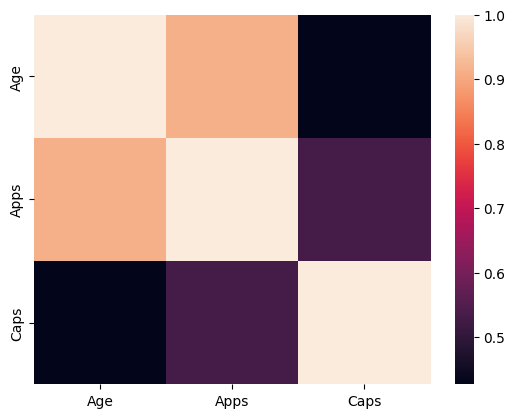

In [57]:
## correlation matrix
data_SalaryPrediction_corr=data_SalaryPrediction[numerical_columns].corr()
sns.heatmap(data_SalaryPrediction_corr)

## 7. Split the dataset

In [58]:
data_x = data_SalaryPrediction.drop(['Wage'], axis = 1)
data_y = data_SalaryPrediction['Wage']
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=0.25)

### show the dataset size after spliting the dataset

In [59]:
print(data_x_train.shape, data_y_train.shape)
print(data_x_test.shape,data_y_test.shape)

(2881, 15) (2881,)
(961, 15) (961,)


#### Mean and standard deviation result

In [60]:
for col in numerical_columns:
  print(col)
  print('\tTraining set mean:', data_x_train[col].mean())
  print('\tTesting set mean:', data_x_test[col].mean())
  print('\tTraining set std:', data_x_train[col].std())
  print('\tTesting set std:', data_x_test[col].std())

Age
	Training set mean: 0.26517060803163156
	Testing set mean: 0.2757091797493553
	Training set std: 0.20886794459407704
	Testing set std: 0.21938420733236186
Apps
	Training set mean: 0.1973285305461633
	Testing set mean: 0.20479977878521063
	Training set std: 0.18220882835729854
	Testing set std: 0.18907767274145107
Caps
	Training set mean: 0.04928458482779899
	Testing set mean: 0.053867499132847725
	Training set std: 0.11206559670877406
	Testing set std: 0.12250378917178928


## Conclusion


By this practise, we got to know that data preprocessing is one of crucial steps before putting the data before training. the dataset which
we recieve are usually quite noisy, so they required proper preprocessing techniques, such that the model doesn't learn the unwanted information.Putting a lot of time is essential, as cleaning makes the data more readable and model friendly, which ultimately helps us in achiving our goals